# Pruebas y Manipulación del código

## 0. Importación de librerías

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from CMPendulum import pendulum as pend, animation as ani, basins as bs, plot_solutions as plot_

In [2]:
%matplotlib auto
%matplotlib auto

Using matplotlib backend: <object object at 0x000002E33F7FA440>
Using matplotlib backend: TkAgg


## 1. Analisis inicial

Las condiciones iniciales corresponden a un conjunto de 3 imanes puestos sobre una circunferencia de radio 0.09 [$m$] de manera simetrica. 

<center> 
<img src="https://raw.githubusercontent.com/AndresGuarin/Images/main/Magnets_page-0001.jpg" width="350px" height="350px">
</center>

### A. Parámetros del código

In [3]:
# Physical parameters
l = 0.5
R = 0
d = 0.03
m = 0.05
mu_P_magn = 2

# Code parameters
h = 0.001
T0 = 2*np.pi*np.sqrt(l/9.8)  # Pendulum period
T = 1                       # Total time of simulation
N = int(T/h)

# Magnets
radio = 0.09 
ang = np.array([0,120,240])
Mx = radio*np.cos(np.deg2rad(ang)); My = radio*np.sin(np.deg2rad(ang))
mu = [-1.4]*3; u = [np.array([0,0,-1])]*3

# Initial Conditions
CI = [0.1, 0.1, 0, 0]

In [4]:
p = pend.pendulum()
p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
p.set_code_parameters(h, N)
p.set_magnets(Mx, My, [0,0,0], mu, u)
p.set_initial_conditions(CI, 'cartesians')
inicio = time.time()
p.find_path(show=True, Return='none')
fin = time.time(); print('Tiempo de ejecución: %.2f'%(fin-inicio))

# Get self
selfp = p.get_self()

====================== Summary report ============================
Physical parameters: 
   l =  0.5
   d =  0.03
   R =  0
   m =  0.05
   mu_P_magn =  2
   mu_P_dir  =  [ 0  0 -1]
   model =  RK4
   law   =  F1
Code parameters:
   h =  0.001
   N =  1000
Initial values
   x  =  0.1
   y  =  0.1
   vx =  0
   vy =  0
   NMAGNETS =  3
   mu_magn  =  [-1.4, -1.4, -1.4]
   mu_dir   =  [array([ 0,  0, -1]), array([ 0,  0, -1]), array([ 0,  0, -1])]
███╗   ███╗ █████╗  ██████╗ ███╗   ██╗███████╗████████╗██╗ ██████╗
████╗ ████║██╔══██╗██╔════╝ ████╗  ██║██╔════╝╚══██╔══╝██║██╔════╝
██╔████╔██║███████║██║  ███╗██╔██╗ ██║█████╗     ██║   ██║██║     
██║╚██╔╝██║██╔══██║██║   ██║██║╚██╗██║██╔══╝     ██║   ██║██║     
██║ ╚═╝ ██║██║  ██║╚██████╔╝██║ ╚████║███████╗   ██║   ██║╚██████╗
╚═╝     ╚═╝╚═╝  ╚═╝ ╚═════╝ ╚═╝  ╚═══╝╚══════╝   ╚═╝   ╚═╝ ╚═════╝

██████╗ ███████╗███╗   ██╗██████╗ ██╗   ██╗██╗     ██╗   ██╗███╗   ███╗
██╔══██╗██╔════╝████╗  ██║██╔══██╗██║   ██║██║     ██║   ██║████╗ ████║
███

### B. Resultados

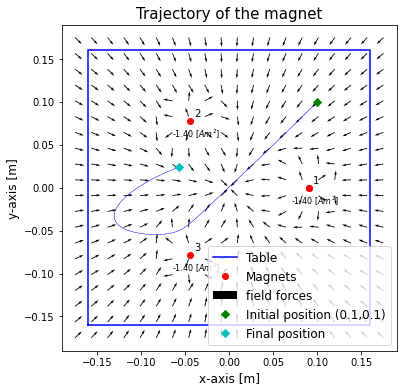

In [5]:
#Plot trajectories
%matplotlib inline
p.plot_alltable()              
p.plot_vector_space(res=20)
p.plot_path()

In [6]:
#Plot Energies evolution
%matplotlib auto
plot_.table_energy_evol(selfp)
plt.show()

Using matplotlib backend: TkAgg


In [7]:
# Plot trayectory 3D
%matplotlib auto
plot_.path3D(selfp)
plt.show()

Using matplotlib backend: TkAgg


## 2. Análisis de trayectorias

### A. Parámetros del código

In [4]:
# Physical parameters
l = 0.5
R = 0
d = 0.03
m = 0.05
mu_P_magn = 2

# Code parameters
h = 0.001
T0 = 2*np.pi*np.sqrt(l/9.8)  # Pendulum period
T = 1                       # Total time of simulation
N = int(T/h)

# Magnets
radio = 0.09 
ang = np.array([0,120,240])
Mx = radio*np.cos(np.deg2rad(ang)); My = radio*np.sin(np.deg2rad(ang))
mu = [-1.4]*3; u = [np.array([0,0,-1])]*3

# Initial Conditions
CI = [[0.08, 0.15, 0, 0],
      [0.08, 0.14, 0, 0],
      [0.08, 0.13, 0, 0],
      [0.08, 0.12, 0, 0],
      [0.08, 0.11, 0, 0],
      [0.08, 0.1,  0, 0]]

### B. Función de grafica de trayectorias

In [5]:
def plot_paths(CI):
    #Create pendulum
    p = pend.pendulum()
    p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
    p.set_code_parameters(h, N)
    p.set_magnets(Mx, My, [0,0,0], mu, u)

    p.plot_alltable()              
    p.plot_vector_space(res=20)
    for ci in CI:
        p.set_initial_conditions(ci, 'cartesians')
        p.find_path(show=False, Return='none') 
        selfp=p.get_self()
        plt.plot(selfp.X, selfp.Y,lw=0.5)            # Path
        plt.plot(selfp.X[0], selfp.Y[0],'Dg', ms=5)  # Initial position

    # Put legends, title, labales, and ticks
    plt.legend(fontsize=12)
    plt.title('Trajectories',fontsize=15)
    plt.xlabel('x-axis [m]',fontsize=12)
    plt.ylabel('y-axis [m]',fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc='upper right')

### C. Pruebas

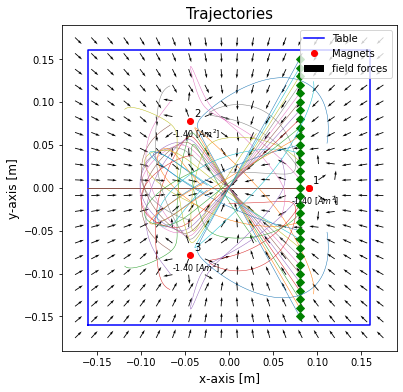

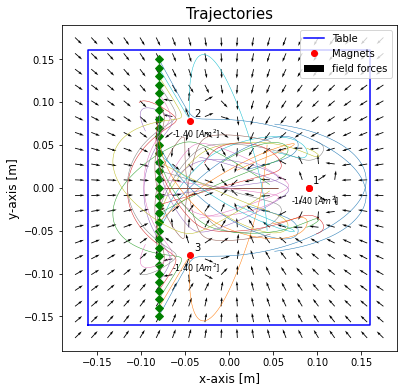

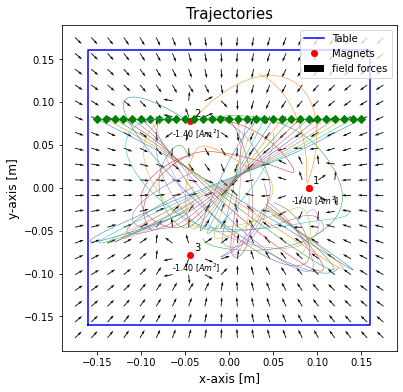

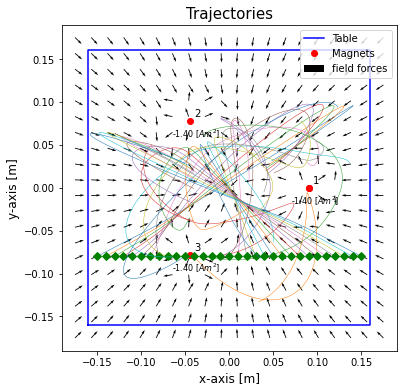

In [22]:
# Initial Conditions
%matplotlib inline
a = -0.15
b = 0.15
NUM = 30
step = (b-a)/NUM
CI1 = [[0.08,a+i*step,0,0] for i in range(0,NUM+1)]
CI2 = [[-0.08,a+i*step,0,0] for i in range(0,NUM+1)]
CI3 = [[a+i*step,0.08,0,0] for i in range(0,NUM+1)]
CI4 = [[a+i*step,-0.08,0,0] for i in range(0,NUM+1)]
plot_paths(CI1); print('End1')
plot_paths(CI2); print('End2')
plot_paths(CI3); print('End3')
plot_paths(CI4); print('End4')
plt.savefig('paths.png',dpi=250)
plt.show()

End5
End6
End7
End8


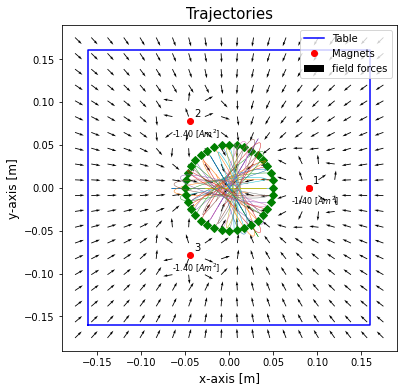

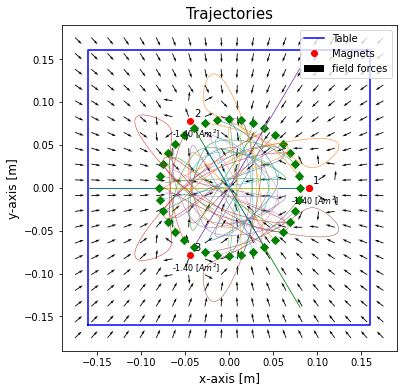

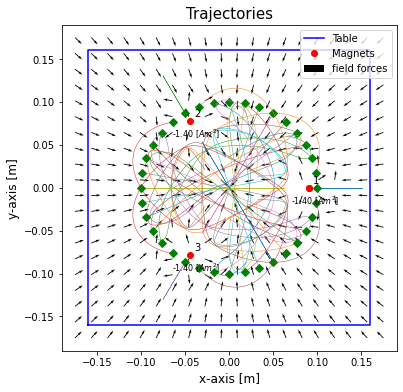

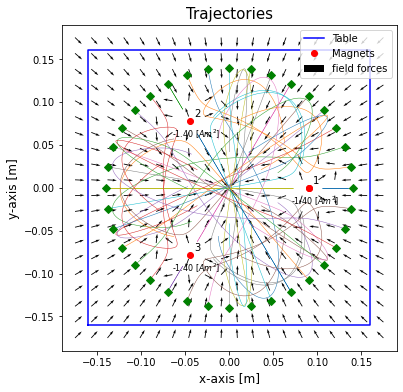

In [25]:
radii = [0.05, 0.08, 0.1, 0.14]
NUM = 36
step = 2*np.pi/NUM
CI5 = [[radii[0]*np.cos(i*step),radii[0]*np.sin(i*step),0,0] for i in range(NUM)]
CI6 = [[radii[1]*np.cos(i*step),radii[1]*np.sin(i*step),0,0] for i in range(NUM)]
CI7 = [[radii[2]*np.cos(i*step),radii[2]*np.sin(i*step),0,0] for i in range(NUM)]
CI8 = [[radii[3]*np.cos(i*step),radii[3]*np.sin(i*step),0,0] for i in range(NUM)]
plot_paths(CI5); print('End5')
plot_paths(CI6); print('End6')
plot_paths(CI7); print('End7')
plot_paths(CI8); print('End8')

End9
End10
End11
End12


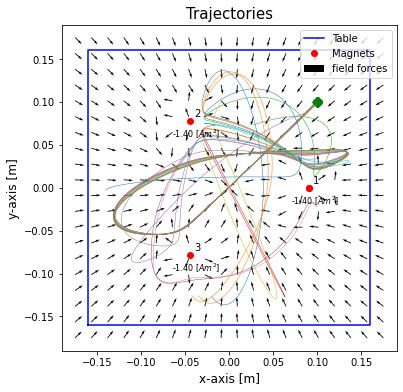

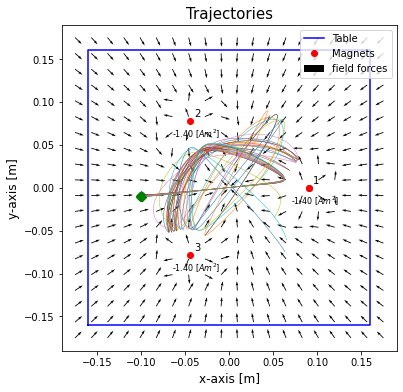

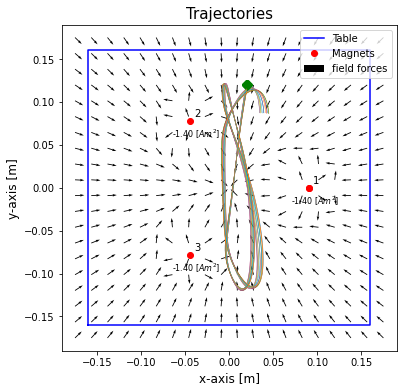

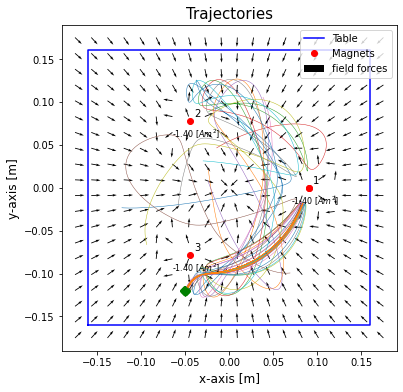

In [29]:
T = 3                       # Total time of simulation
N = int(T/h)
radii = 0.001
NUM = 12
step = 2*np.pi/NUM
CI9 = [[0.1+radii*np.cos(i*step),0.1+radii*np.sin(i*step),0,0] for i in range(NUM)]
CI10 = [[-0.1+radii*np.cos(i*step),-0.01+radii*np.sin(i*step),0,0] for i in range(NUM)]
CI11 = [[0.02+radii*np.cos(i*step),0.12+radii*np.sin(i*step),0,0] for i in range(NUM)]
CI12 = [[-0.05+radii*np.cos(i*step),-0.12+radii*np.sin(i*step),0,0] for i in range(NUM)]
plot_paths(CI9); print('End9')
plot_paths(CI10); print('End10')
plot_paths(CI11); print('End11')
plot_paths(CI12); print('End12')

End13
End14
End15


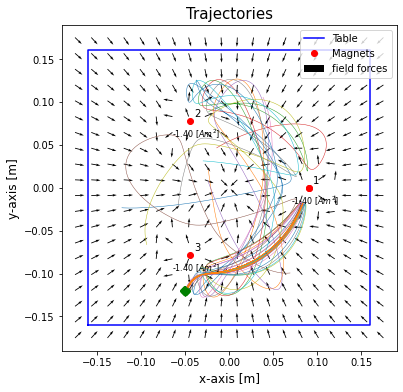

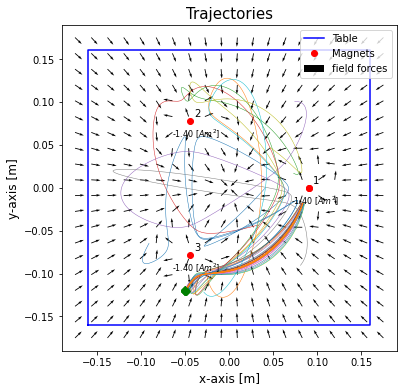

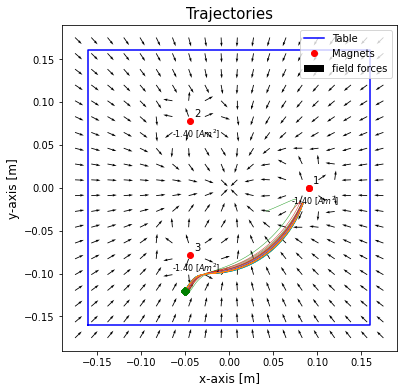

In [30]:
radii = [0.001, 0.0005, 0.0001]
CI13 = [[-0.05+radii[0]*np.cos(i*step),-0.12+radii[0]*np.sin(i*step),0,0] for i in range(NUM)]
CI14 = [[-0.05+radii[1]*np.cos(i*step),-0.12+radii[1]*np.sin(i*step),0,0] for i in range(NUM)]
CI15 = [[-0.05+radii[2]*np.cos(i*step),-0.12+radii[2]*np.sin(i*step),0,0] for i in range(NUM)]
plot_paths(CI13); print('End13')
plot_paths(CI14); print('End14')
plot_paths(CI15); print('End15')

**Observaciones**
* Dada la simetría del problema, es posible estudiar la dinámica del sistema simplemente tomando puntos sobre la tercera parte del tablero.
* ¿Qué tan pequeña debe ser la separación para que halla divergencia de trayectorias? 
* ¿El exponente de lyapunov depende de dicha separación?
* ¿Qué tan importante es el tiempo que se necesita esperar hasta que halla divergencia en las trayectorias?
* ¿Es posible estimar t en lugar de lambda para medir el caos?

In [56]:
def plot_map(CI):
    #Create pendulum
    p = pend.pendulum()
    p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
    p.set_code_parameters(h, N)
    p.set_magnets(Mx, My, [0,0,0], mu, u)
    
    a1 = np.cos(2*np.pi/3)
    a2 = np.cos(4*np.pi/3)
    b1 = np.sin(2*np.pi/3)
    b2 = np.sin(4*np.pi/3)
           
    plt.figure(figsize=(6,6))
    for ci in CI:
        p.set_initial_conditions(ci, 'cartesians')
        p.find_path(show=False, Return='none') 
        selfp=p.get_self()
        X = selfp.X
        Y = selfp.Y
        plt.plot(X, Y, lw=0.05, color='blue')   # Path
        plt.plot(X*a1 - Y*b1, X*b1 + Y*a1, lw=0.05, color='blue')   # Path +120°
        plt.plot(X*a2 - Y*b2, X*b2 + Y*a2, lw=0.05, color='blue')   # Path +240°
        
    # Put legends, title, labales, and ticks
    plt.legend(fontsize=12)
    plt.title('Trajectories',fontsize=15)
    plt.xlabel('x-axis [m]',fontsize=12)
    plt.ylabel('y-axis [m]',fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(-0.18,0.18)
    plt.ylim(-0.18,0.18)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


End16


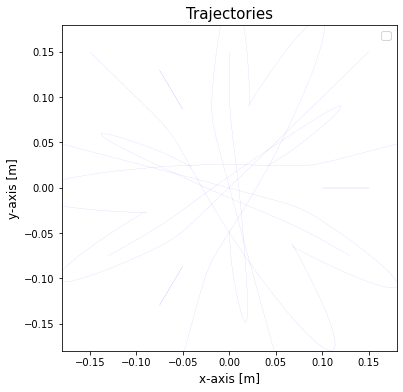

In [57]:
%matplotlib inline
NUM=50
t = np.linspace(-0.15,0.15,NUM)
X,Y = np.meshgrid(t,t)
X = X.flatten()
Y = Y.flatten()
ii = [Y[i]>=0 and Y[i] >= -np.sqrt(3)/3*X[i] for i in range(len(X))]
X = X[ii]
Y = Y[ii]
CI16 = [[X[i],Y[i],0,0] for i in range(len(X))]
plot_map(CI16); print('End16')
plt.savefig('map_paths2.svg',dpi=1000)